# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataset

In [2]:
df = pd.read_csv('C:\\Users\\OWNER\\Desktop\\Machine Learning FILES\\day_BIKE_SHARING_DATASET.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspecting the Dataset

In [4]:
df.shape

(730, 16)

In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Checking null values

In [7]:
# checking percentage of null values (column wise)
df__cols_nulls = round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

In [8]:
df__cols_nulls

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
# checking percentage of null values (row_wise)
df__row_nulls = round(100*(df.isnull().sum(axis=1)/len(df)),2).sort_values(ascending=False)

In [10]:
df__row_nulls

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

Inference:
We can say that there are no null values the the given dataet

## Checking duplicate values

In [11]:
df_duplicates = df.copy()

In [12]:
df_duplicates.drop_duplicates(subset=None, inplace=True)

In [13]:
df_duplicates.shape

(730, 16)

In [14]:
df.shape

(730, 16)

Inference:
It can be say that, there are no duplicate values in the datase.

## Data cleaning

Checking value_counts() for entire dataframe.

This will help to identify any Unknown/Junk values present in the dataset.

Create a copy of the dataframe, without the 'instant' column,as this will have unique values, and donot make sense to do a value count on it.

In [15]:
df_new=df.iloc[:,1:16]

In [16]:
df_new.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
for i in df_new:
    print(df_new[i].value_counts(ascending=False), '\n\n\n')

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64 



3    188
2    184
1    180
4    178
Name: season, dtype: int64 



0    365
1    365
Name: yr, dtype: int64 



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64 



0    709
1     21
Name: holiday, dtype: int64 



1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64 



1    504
0    226
Name: workingday, dtype: int64 



1    463
2    246
3     21
Name: weathersit, dtype: int64 



26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 



32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625

Infrerence : It can be say that there is no unknown values in the dataset.

### Removing redundant & unwanted columns

Based on the high level look at the data, the following variables can be removed from further analysis:

instant : Its only an index value , we have a default index for the same purpose

dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can carry out our analysis without this column .

casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

We will save the new dataframe as df_1, so that the original dataset is preserved for any future analysis/validation

In [18]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [19]:
df_1=df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [20]:
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Convert dtype int to Catagorical Variables

In [21]:
# Check the datatypes before convertion
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


-  season','mnth','weekday','weathersit' are catagorical variables not int64 hence convreting into to catagorical.

In [22]:
# Converting 'Season' to a categorical variable
df_1['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)
df_1['season'].value_counts()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_14872\3213528362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace = True)


Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [23]:
# Converting 'mnth' to categorical variable 

import calendar

df_1['mnth'] = df_1['mnth'].apply(lambda x: calendar.month_abbr[x])
df_1['mnth'].unique()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_14872\3302946957.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['mnth'] = df_1['mnth'].apply(lambda x: calendar.month_abbr[x])


array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [24]:
# Converting 'weekday' to objectin preparation for making dummy variable

df_1['weekday'] = df_1['weekday'].astype('object')

C:\Users\OWNER\AppData\Local\Temp\ipykernel_14872\2919293929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['weekday'] = df_1['weekday'].astype('object')


In [25]:
# Converting 'weathersit' to a categorical variable

df_1['weathersit']=df_1['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])
df_1['weathersit'].value_counts()

C:\Users\OWNER\AppData\Local\Temp\ipykernel_14872\1032144433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['weathersit']=df_1['weathersit'].replace([1, 2, 3], ['Clear', 'Mist_Cloudy', 'Light_Snow_Rain'])


Clear              463
Mist_Cloudy        246
Light_Snow_Rain     21
Name: weathersit, dtype: int64

In [26]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Univariate Analysis

### Visualizing Numerical Variables

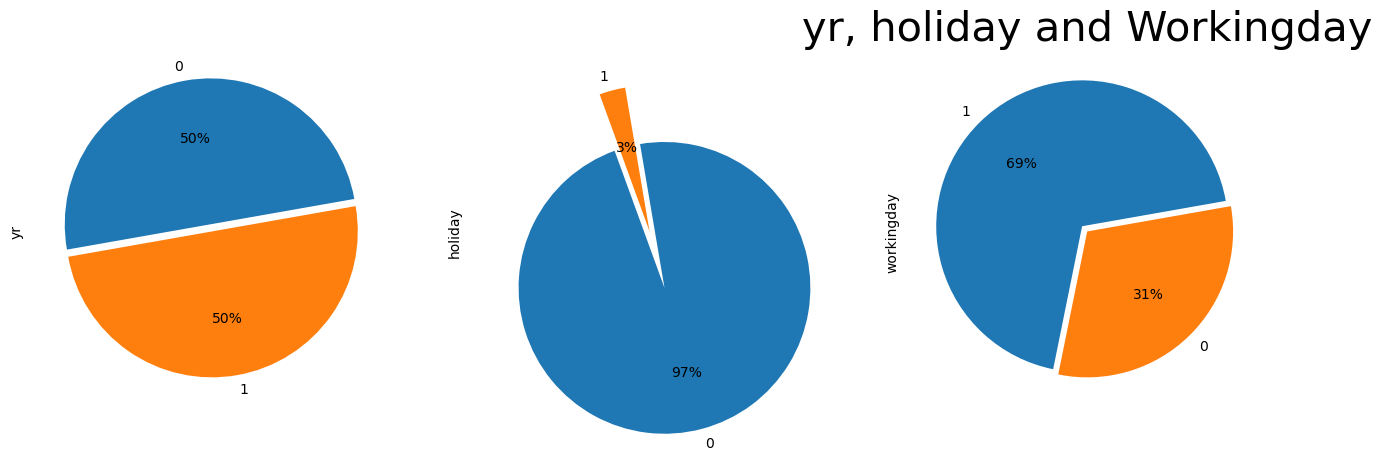

In [27]:
plt.figure(figsize = [16,15])
plt.subplot(131)
df_1['yr'].value_counts(normalize = True).plot.pie(explode=(0.05, 0), autopct = "%1.0f%%", startangle=10)
plt.subplot(132) 
df_1['holiday'].value_counts(normalize = True).plot.pie(explode=(0.4, 0), autopct = "%1.0f%%", startangle=110)
plt.subplot(133)
df_1['workingday'].value_counts(normalize = True).plot.pie(explode=(0.05, 0),autopct = "%1.0f%%", startangle=10)
plt.title('yr, holiday and Workingday',fontsize=30)
plt.show()

Inference : 
'Yr' is expected to be 50%-50% daily records of bike usage.
Significantly less number of holidays(1) as compared to non-holidays(0) hence bike usage is more in 0.
The same case applies to 'workingday' due to higher number of days vs non-working days.

### Visualizing Categorical Variables

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

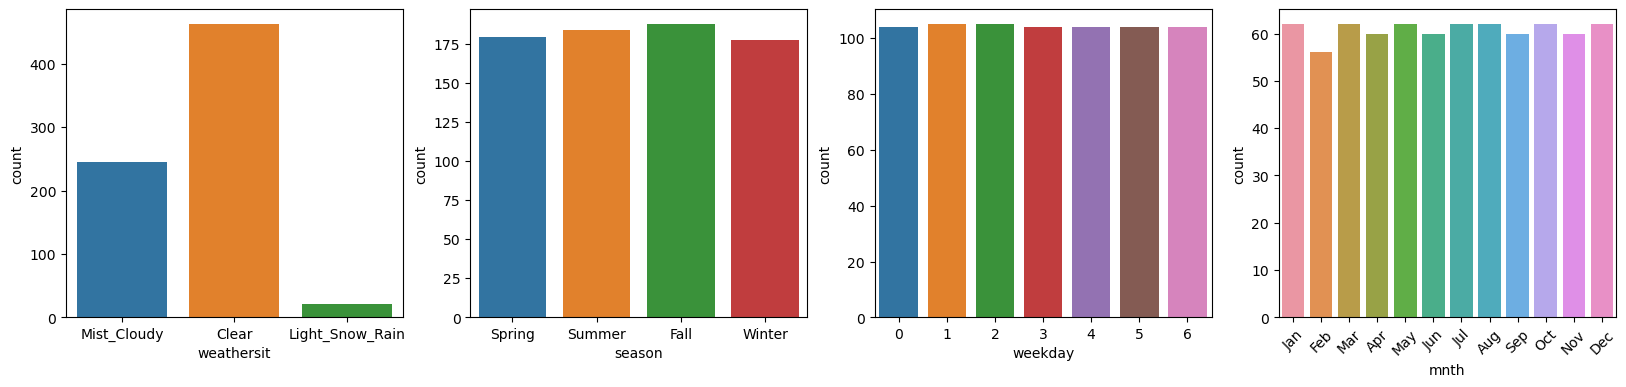

In [29]:
plt.figure(figsize = [20,4])
plt.subplot(141)
sns.countplot(data = df_1, x = 'weathersit')
plt.subplot(142)
sns.countplot(data = df_1, x = 'season')
plt.subplot(143)
sns.countplot(data = df_1, x = 'weekday')
plt.subplot(144)
plt.xticks(rotation = 45)
sns.countplot(data = df_1, x = 'mnth')
plt.show()

Infrrence : 
When 'weathersit' is Clear, Few clouds, Partly cloudy, Partly cloudy the bikes are usage are more.
The rest of the variables are shows very close values.

## Bivariate Analysis

### Visualising Numeric Variables Using a pairplot¶

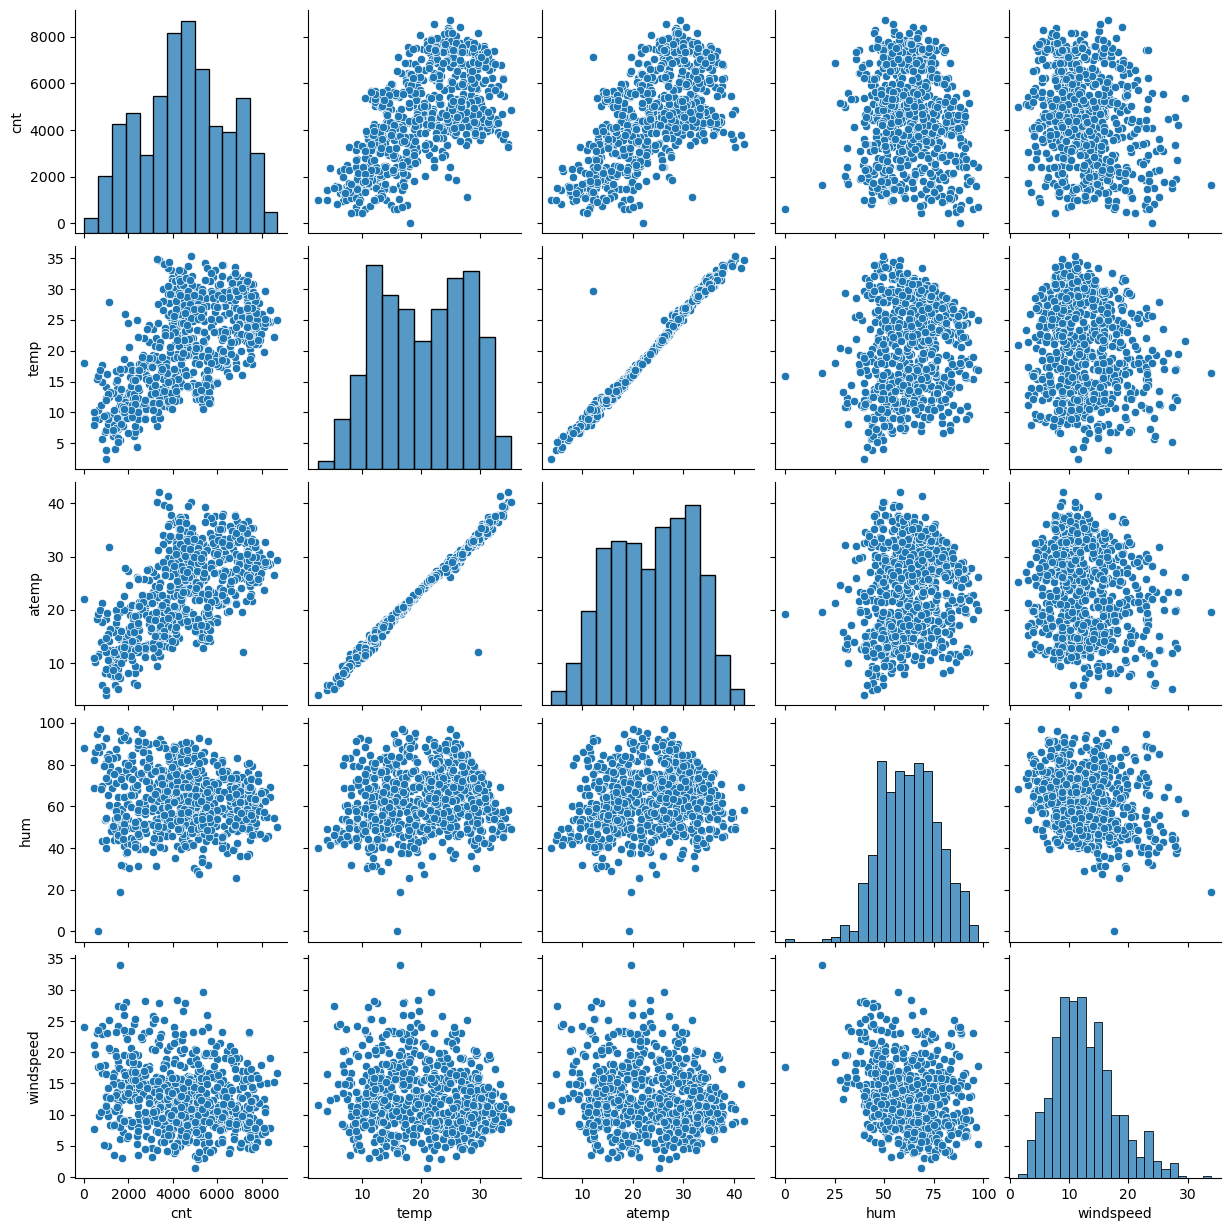

In [30]:
# we will visualize the variables using pairplot. so that we can visualize the data at a glance.
sns.pairplot(data = df_1, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Inference : 
variables like atemp , temp etc. show a positive correlation with the target variable cnt.

### Visualising Categorical Variables Using a Boxplot

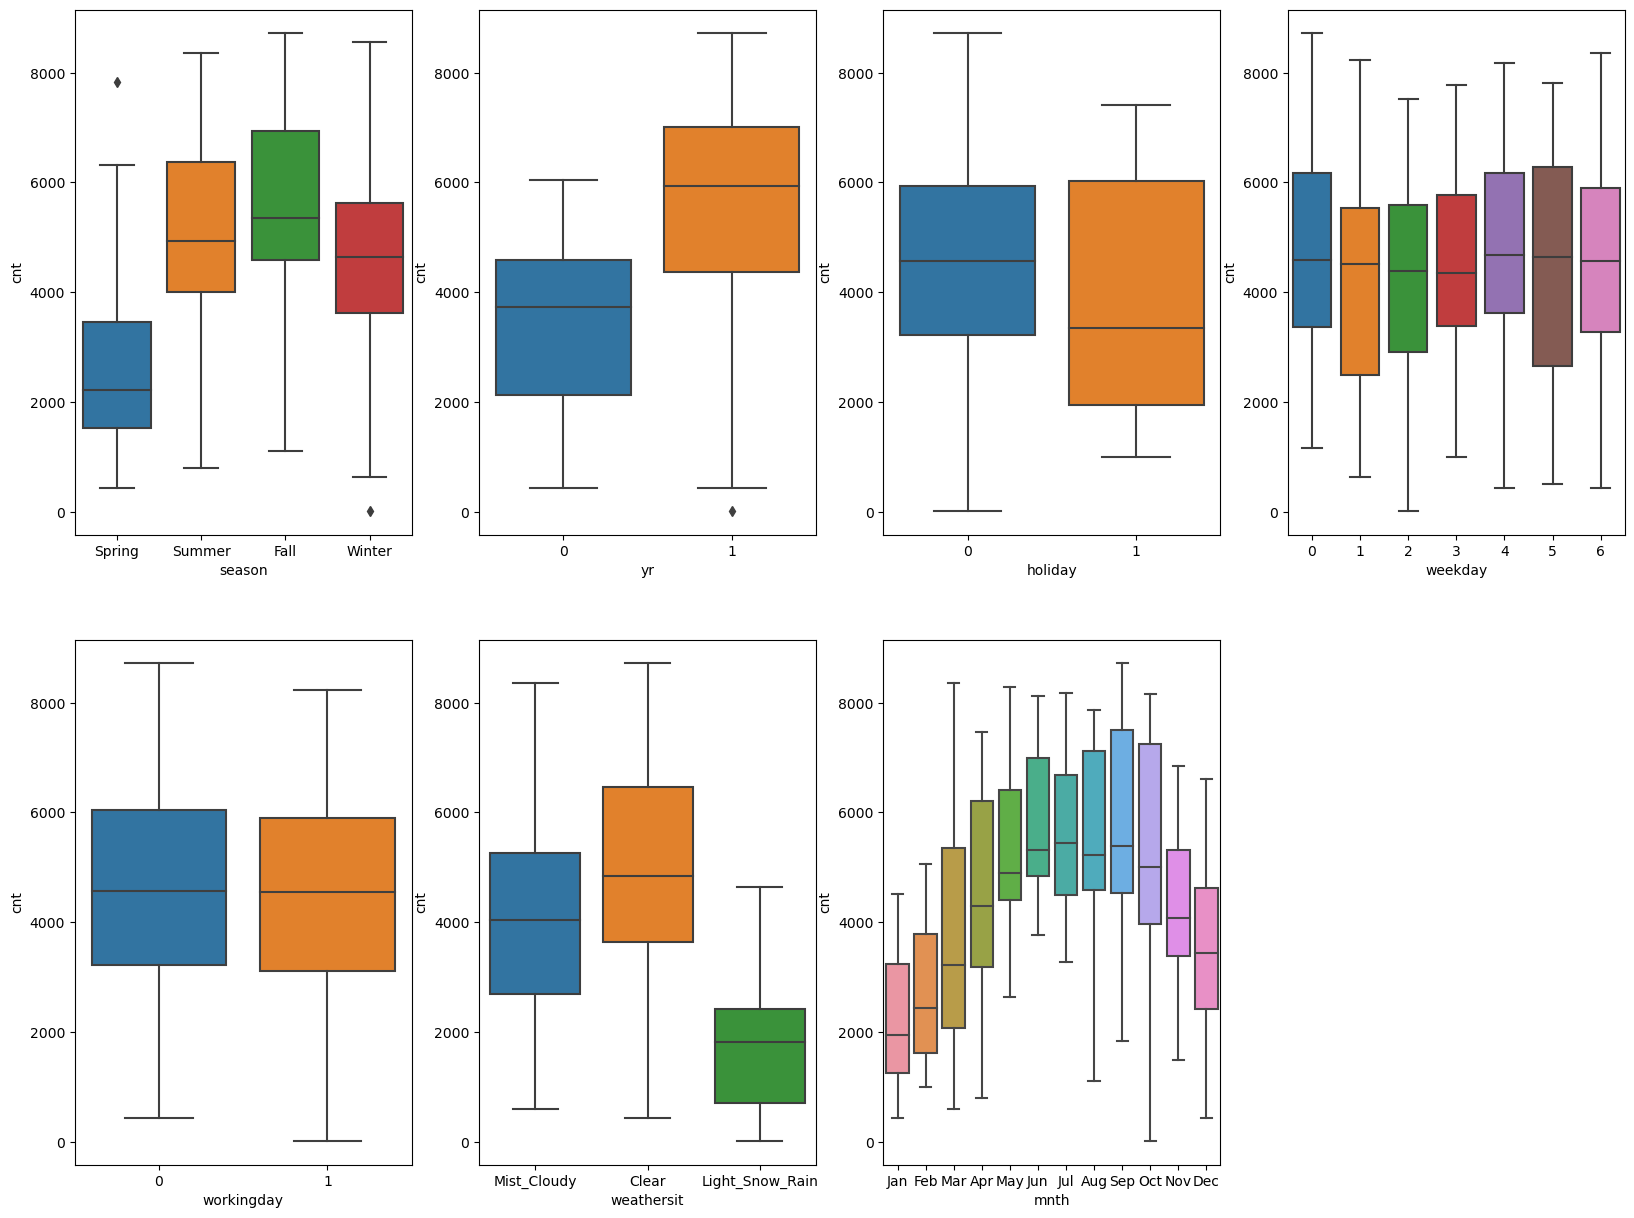

In [31]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_1)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_1)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_1)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_1)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_1)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_1)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_1)
plt.show()

Inference : 
The boxplots clearly shows the qualitative distributions of the data, now if the model suggests the important predictors, using these graphs we can be more confident about the predictions of the model.
For the variable season, we can clearly see that the category 3 : Fall, has the highest median, which shows that the demand was high during this season. It is least for 1: spring .
The year 2019 had a higher count of users as compared to the year 2018
The bike demand is almost constant throughout the week.
The count of total users is in between 4000 to 6000 (~5500) during clear weather
The count is highest in the month of August
The count of users is less during the holidays

## Creating Dummy Variables

In [32]:
import warnings
warnings.filterwarnings('ignore')

We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

This below code does 3 things:
1. Create Dummy variable.
2. Drop original variable for which the dummy was created.
3. Drop first dummy variable for each set of dummies created.

In [33]:
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Columns: 743 entries, season to dteday_31-12-2019
dtypes: float64(4), int64(10), uint8(729)
memory usage: 599.7 KB


## Splitting the data

Splitting the data to Train and Test : - We will now split the data into TRAIN and TEST (70:30 ratio) 
We will use train_test_split method from sklearn package for this

Check the shape & info before spliting

In [34]:
df_new.shape

(730, 743)

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Columns: 743 entries, season to dteday_31-12-2019
dtypes: float64(4), int64(10), uint8(729)
memory usage: 599.7 KB


In [36]:
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum',
       ...
       'dteday_31-05-2018', 'dteday_31-05-2019', 'dteday_31-07-2018',
       'dteday_31-07-2019', 'dteday_31-08-2018', 'dteday_31-08-2019',
       'dteday_31-10-2018', 'dteday_31-10-2019', 'dteday_31-12-2018',
       'dteday_31-12-2019'],
      dtype='object', length=743)

In [37]:
import sklearn
from sklearn.model_selection import train_test_split

We should specify 'random_state' so that the train and test data set always have the same rows, respectively

In [38]:
df_train, df_test = train_test_split(df_new, train_size = 0.70, test_size = 0.30, random_state = 100)

Verify the info and shape of the dataframes after split:

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Columns: 743 entries, season to dteday_31-12-2019
dtypes: float64(4), int64(10), uint8(729)
memory usage: 422.8 KB


In [40]:
df_train.shape

(510, 743)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Columns: 743 entries, season to dteday_31-12-2019
dtypes: float64(4), int64(10), uint8(729)
memory usage: 181.6 KB


In [42]:
df_test.shape

(219, 743)

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Columns: 743 entries, season to dteday_31-12-2019
dtypes: float64(4), int64(10), uint8(729)
memory usage: 422.8 KB


In [44]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum',
       ...
       'dteday_31-05-2018', 'dteday_31-05-2019', 'dteday_31-07-2018',
       'dteday_31-07-2019', 'dteday_31-08-2018', 'dteday_31-08-2019',
       'dteday_31-10-2018', 'dteday_31-10-2019', 'dteday_31-12-2018',
       'dteday_31-12-2019'],
      dtype='object', length=743)

By Observing that data we can say that 'temp', 'atemp', 'hum', 'windspeed','cnt' are the numerical 

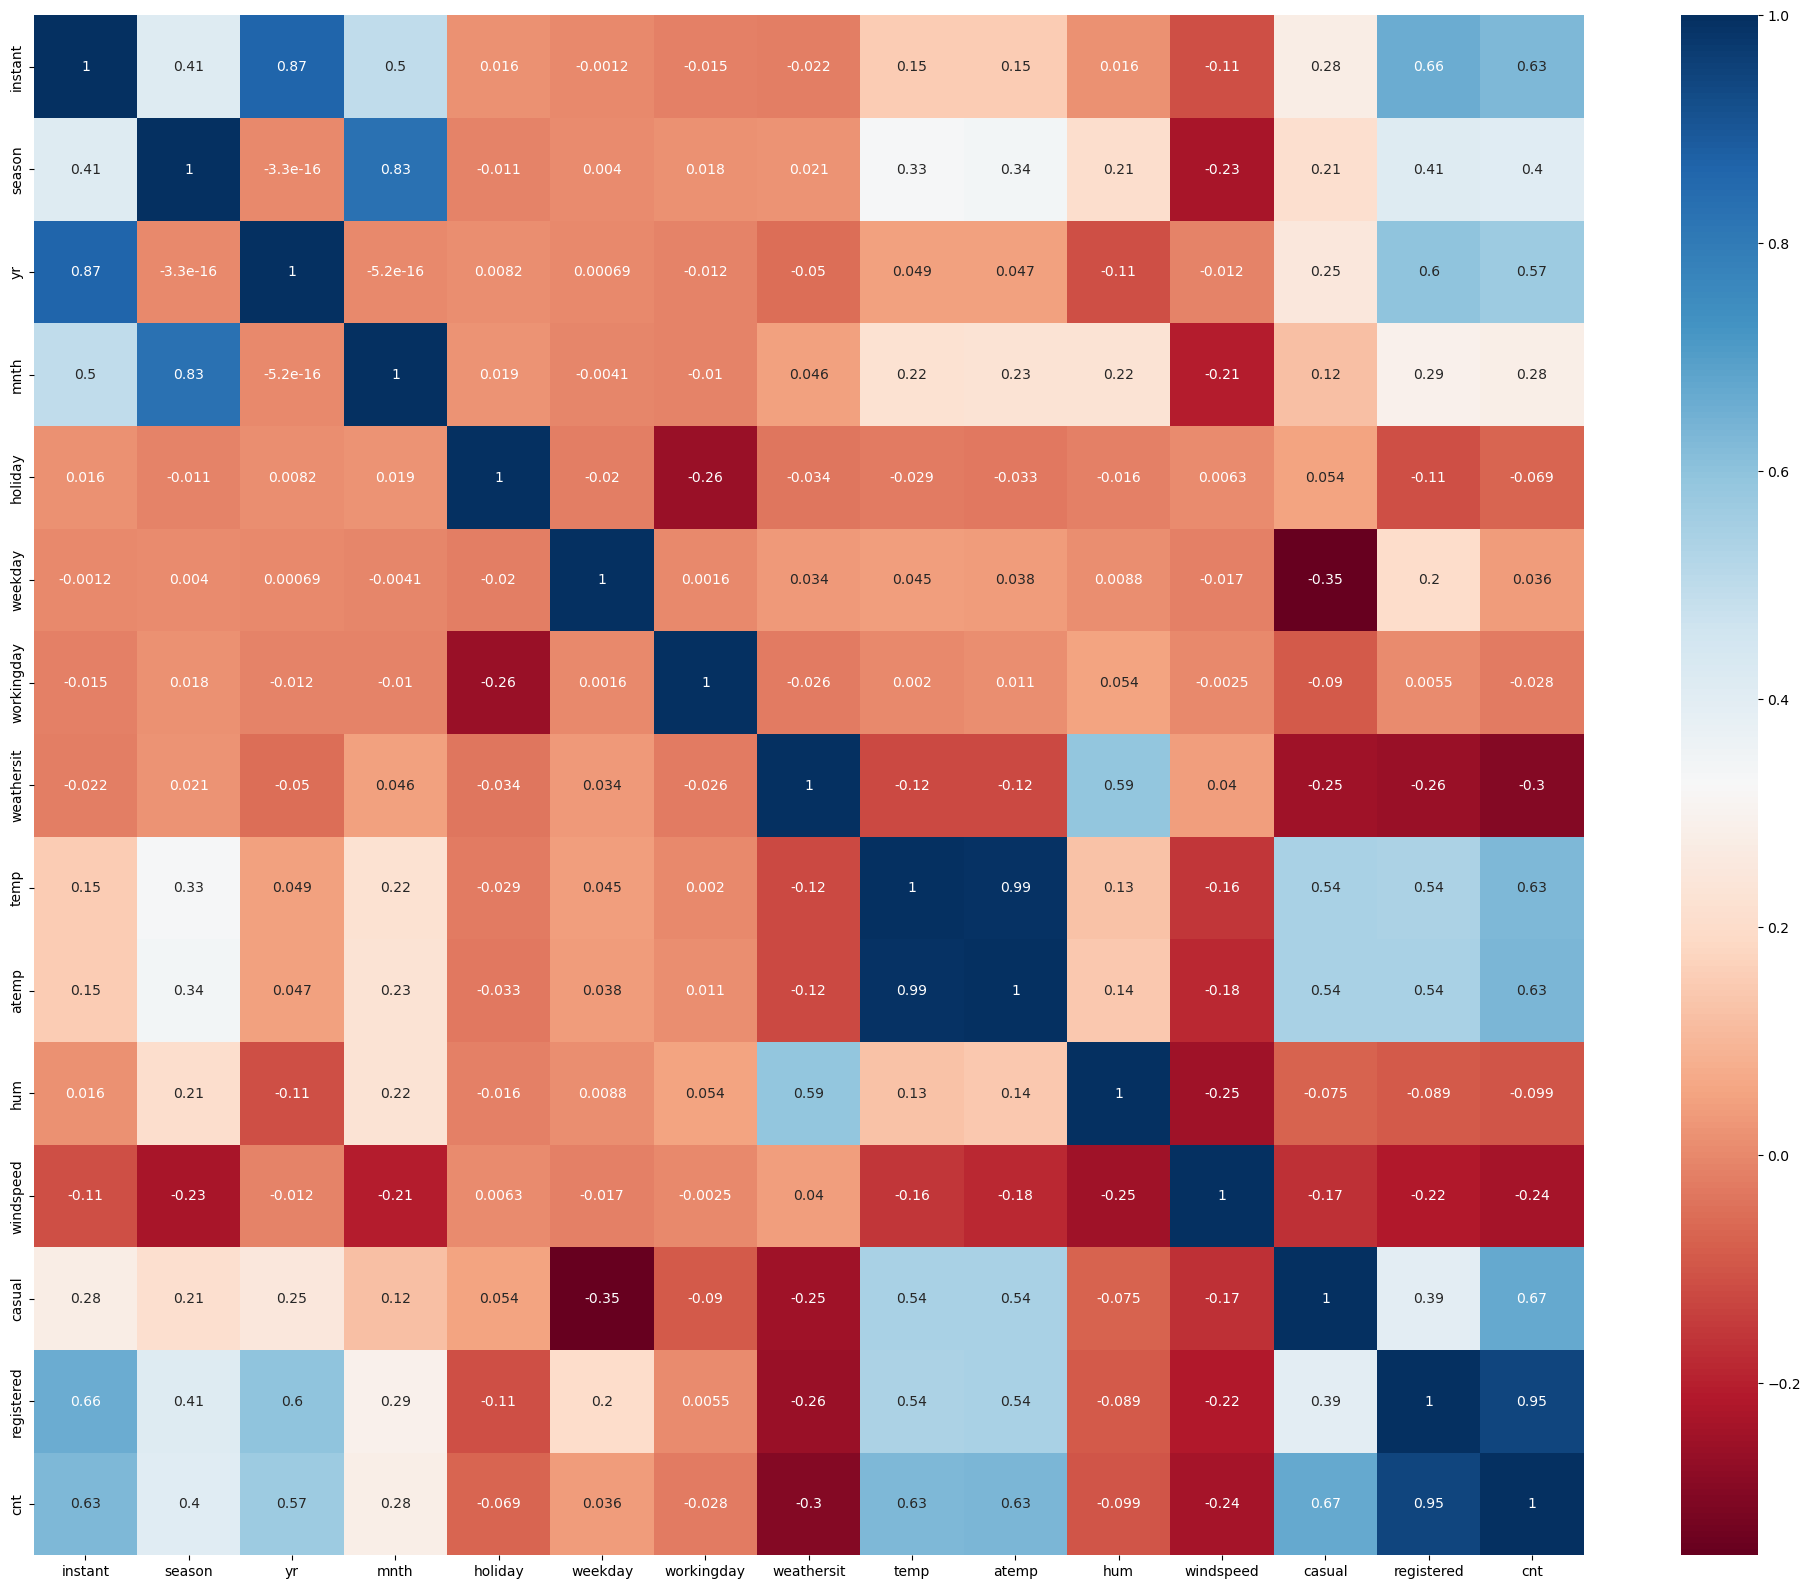

In [45]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

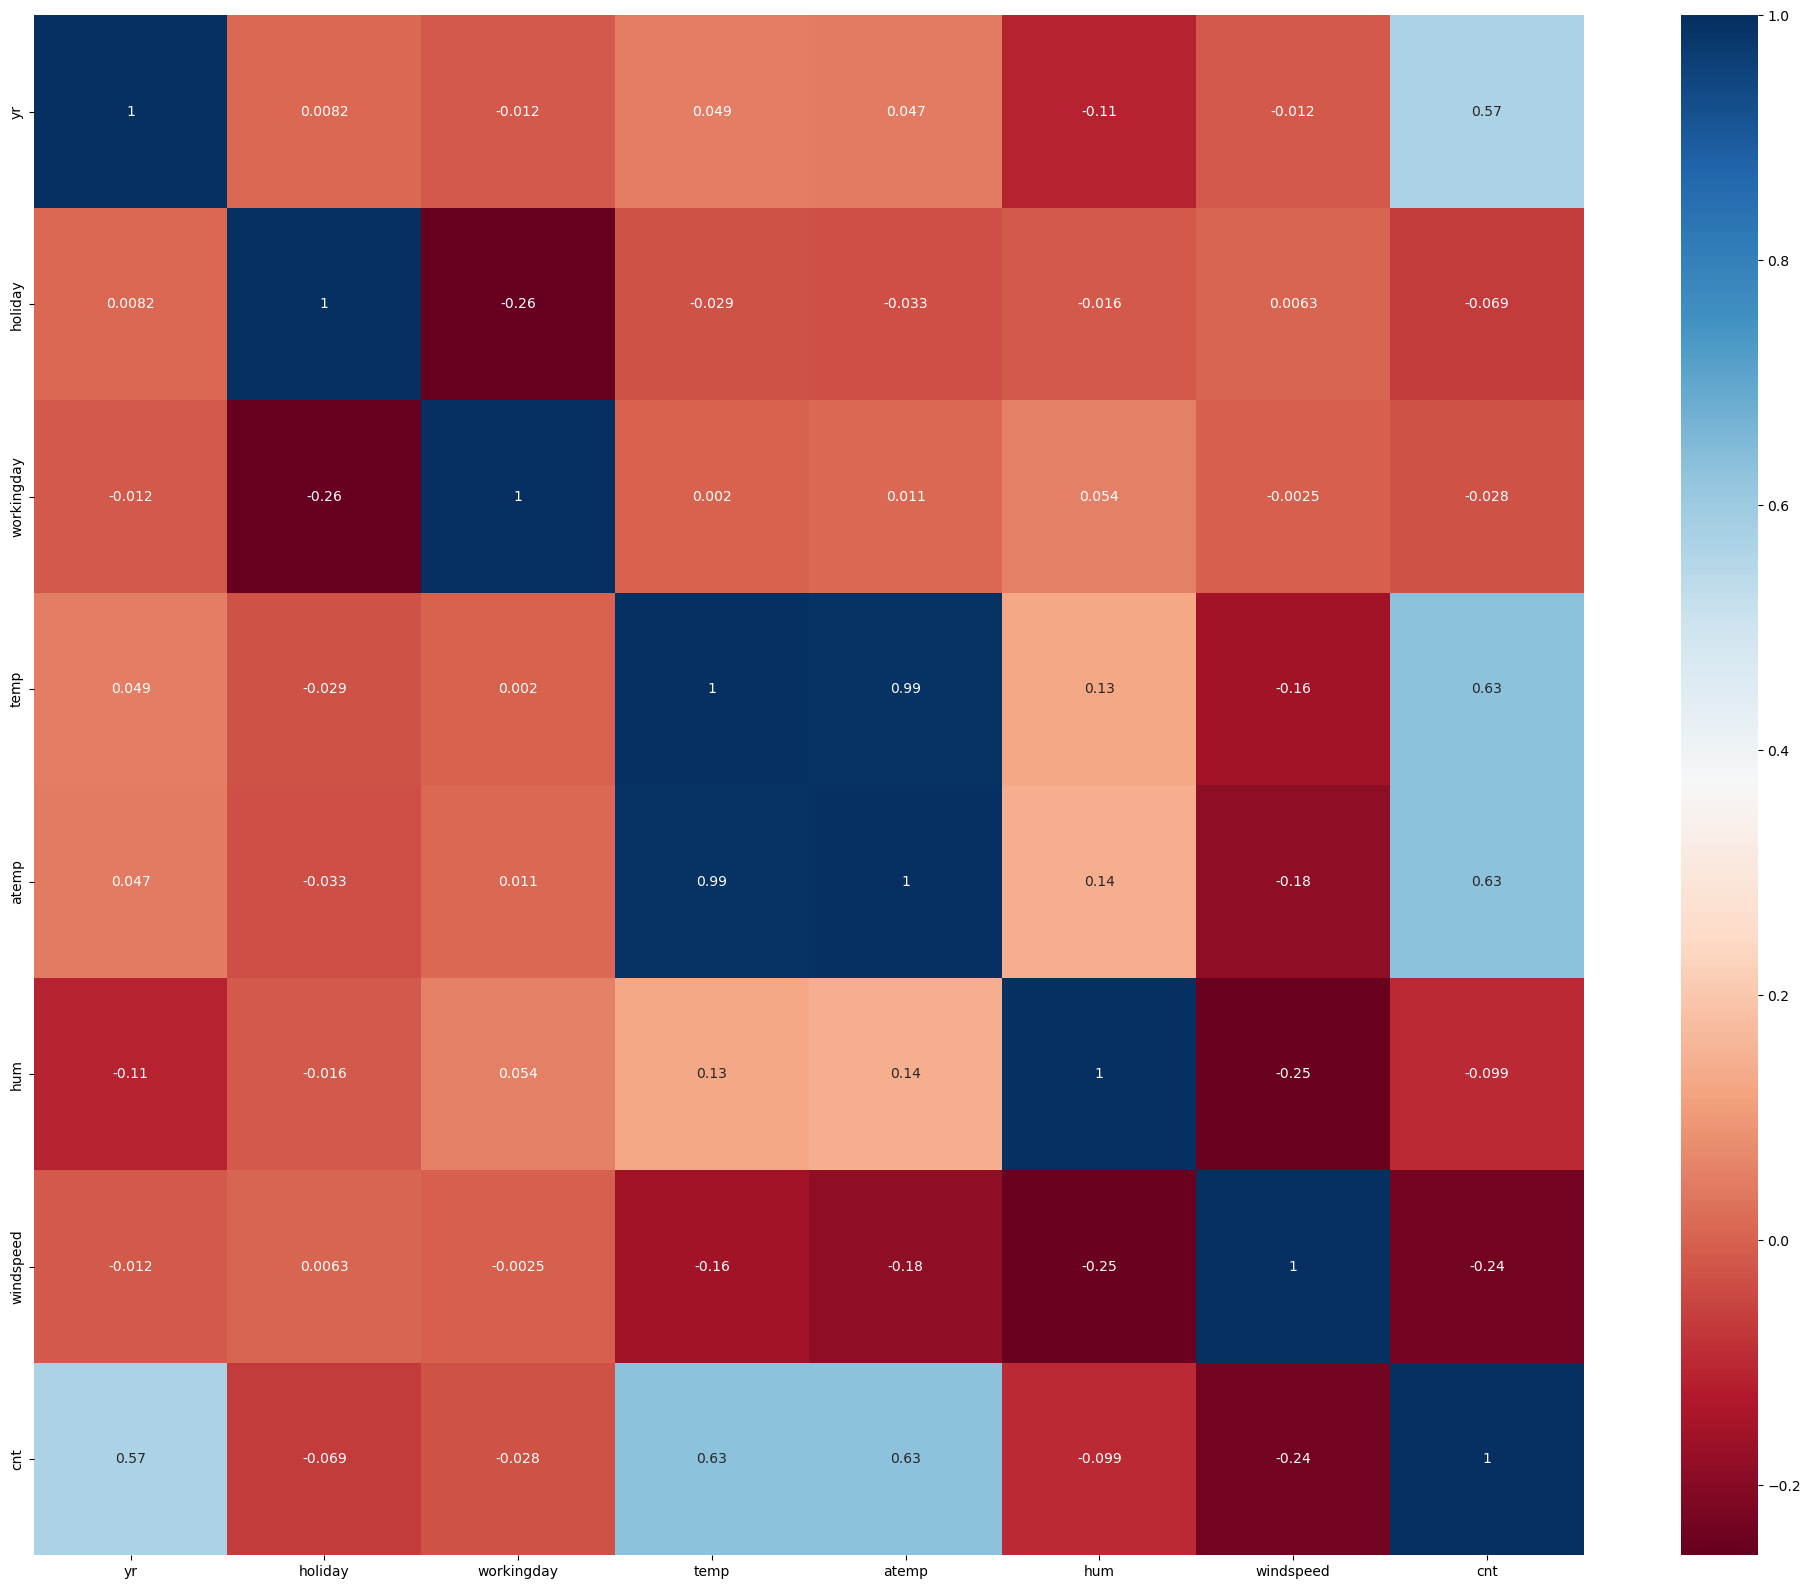

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(df_1.corr(), annot = True, cmap="RdBu")
plt.show()

Inference : 
We can assume that the correlation between 'temp','atemp' vs 'cnt' is very high.

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## RESCALING THE FEATURES

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
df_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum',
       ...
       'dteday_31-05-2018', 'dteday_31-05-2019', 'dteday_31-07-2018',
       'dteday_31-07-2019', 'dteday_31-08-2018', 'dteday_31-08-2019',
       'dteday_31-10-2018', 'dteday_31-10-2019', 'dteday_31-12-2018',
       'dteday_31-12-2019'],
      dtype='object', length=743)

In [49]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [50]:
# Checking values after scaling
df_train[num_vars]

,temp,atemp,hum,windspeed,cnt
653,0.509887,0.501133,0.575354,0.300794,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
...,...,...,...,...,...
526,0.824514,0.762183,0.605840,0.355596,0.764151
578,0.863973,0.824359,0.679690,0.187140,0.832835
53,0.202618,0.218747,0.435939,0.111379,0.218017
350,0.248216,0.223544,0.577930,0.431816,0.312586


In [51]:
df_train[num_vars].columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

In [52]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


## BUILDING A LINEAR MODEL

Dividing into X and Y sets for the model building

In [53]:
y_train = df_train[num_vars].pop('cnt')
X_train = df_train
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

RFE( Recursive feature elimination): We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [54]:
# Running RFE with the output number of the variable equal to 15
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe = RFE(lm)

rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]
col


Index(['season', 'yr', 'mnth', 'holiday', 'weathersit', 'temp', 'atemp',
       'windspeed', 'casual', 'registered',
       ...
       'dteday_30-07-2018', 'dteday_30-07-2019', 'dteday_30-10-2018',
       'dteday_30-12-2019', 'dteday_31-01-2018', 'dteday_31-03-2018',
       'dteday_31-03-2019', 'dteday_31-10-2018', 'dteday_31-10-2019',
       'dteday_31-12-2018'],
      dtype='object', length=371)

In [55]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'hum', 'cnt', 'dteday_01-02-2018',
       'dteday_01-02-2019', 'dteday_01-04-2018', 'dteday_01-07-2018',
       'dteday_01-07-2019', 'dteday_01-08-2019',
       ...
       'dteday_30-11-2019', 'dteday_30-12-2018', 'dteday_31-01-2019',
       'dteday_31-05-2018', 'dteday_31-05-2019', 'dteday_31-07-2018',
       'dteday_31-07-2019', 'dteday_31-08-2018', 'dteday_31-08-2019',
       'dteday_31-12-2019'],
      dtype='object', length=372)

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using STATS MODEL

## Model - 1

### VIF Check

In [57]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,atemp,4078.63
5,temp,3751.64
0,season,353.41
2,mnth,251.34
9,registered,74.29
...,...,...
183,dteday_16-05-2018,1.02
136,dteday_12-03-2018,1.02
55,dteday_04-05-2019,1.02
258,dteday_22-02-2018,1.02


In [59]:
import statsmodels.api as sm

In [60]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [61]:
# Check the parameters obtained

lr1.params

const               -2.531063e-03
season              -6.938894e-17
yr                   9.714451e-17
mnth                -2.775558e-17
holiday             -3.330669e-16
                         ...     
dteday_31-03-2018   -3.469447e-16
dteday_31-03-2019    2.775558e-16
dteday_31-10-2018   -5.551115e-16
dteday_31-10-2019   -4.996004e-16
dteday_31-12-2018    6.661338e-16
Length: 372, dtype: float64

## Model - 2

Removing the variable 'atemp' based on its Very High 'VIF' value.
Even though the VIF of atemp is second highest, we decided to drop 'atemp'.

In [62]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### VIF Check

In [63]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,353.41
2,mnth,251.34
8,registered,67.56
5,temp,59.41
7,casual,26.41
...,...,...
135,dteday_12-03-2018,1.02
173,dteday_15-08-2019,1.02
68,dteday_06-02-2018,1.01
257,dteday_22-02-2018,1.01


In [64]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [65]:
lr2.params

const               -2.531063e-03
season               9.714451e-17
yr                  -1.526557e-16
mnth                 1.075529e-16
holiday             -2.775558e-16
                         ...     
dteday_31-03-2018   -1.804112e-16
dteday_31-03-2019   -3.330669e-16
dteday_31-10-2018   -1.110223e-16
dteday_31-10-2019   -3.330669e-16
dteday_31-12-2018   -3.330669e-16
Length: 371, dtype: float64

In [66]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.563e+27
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:32:42   Log-Likelihood:                 16465.
No. Observations:                 510   AIC:                        -3.219e+04
Df Residuals:                     139   BIC:                        -3.062e+04
Df Model:                         370                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0025   2.77e-1

## Model - 3

Removing the variable 'temp' based on its Very High 'VIF' value.

In [67]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

### VIF Check

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,325.56
2,mnth,227.11
7,registered,42.55
4,weathersit,21.29
6,casual,16.68
...,...,...
271,dteday_23-02-2018,1.01
67,dteday_06-02-2018,1.01
320,dteday_27-02-2018,1.01
256,dteday_22-02-2018,1.01


In [69]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [70]:
# Check the parameters obtained

lr3.params

const               -2.531063e-03
season              -2.775558e-17
yr                  -6.938894e-17
mnth                -6.071532e-18
holiday              5.551115e-17
                         ...     
dteday_31-03-2018   -1.110223e-16
dteday_31-03-2019    1.165734e-15
dteday_31-10-2018   -5.551115e-17
dteday_31-10-2019    0.000000e+00
dteday_31-12-2018    2.220446e-16
Length: 370, dtype: float64

In [71]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.221e+27
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:33:17   Log-Likelihood:                 16437.
No. Observations:                 510   AIC:                        -3.213e+04
Df Residuals:                     140   BIC:                        -3.057e+04
Df Model:                         369                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0025   2.66e-1

## Model - 4

Removing the variable windspeed based on its Very High 'VIF' value.
Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

Removing the variable windspeed based on its Very High 'VIF' value.
Even though the VIF of windspeed is second highest, we decided to drop 'windspeed' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [72]:
X_train_new = X_train_new.drop(['windspeed'], axis = 1)

### VIF Check

In [73]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,302.86
2,mnth,206.12
6,registered,41.99
4,weathersit,16.59
5,casual,16.22
...,...,...
8,dteday_01-03-2018,1.01
66,dteday_06-02-2018,1.01
81,dteday_07-02-2018,1.01
83,dteday_07-03-2018,1.01


In [74]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [75]:
# Check the parameters obtained

lr4.params

const               -2.531063e-03
season              -1.110223e-16
yr                   1.040834e-16
mnth                -1.908196e-17
holiday             -2.775558e-16
                         ...     
dteday_31-03-2018   -1.249001e-16
dteday_31-03-2019   -1.110223e-16
dteday_31-10-2018    1.387779e-16
dteday_31-10-2019   -1.110223e-16
dteday_31-12-2018   -5.551115e-17
Length: 369, dtype: float64

In [76]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.888e+27
Date:                Tue, 02 Jan 2024   Prob (F-statistic):               0.00
Time:                        16:33:53   Log-Likelihood:                 16663.
No. Observations:                 510   AIC:                        -3.259e+04
Df Residuals:                     141   BIC:                        -3.103e+04
Df Model:                         368                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0025   1.47e-1

## Model - 5

All Variables VIF values are well below 5. The 'mnth' variable having its High P-value 0.048 which is close to 0.05 hence for safety purpose I drop this variable.

In [77]:
X_train_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weathersit', 'casual', 'registered',
       'dteday_01-01-2019', 'dteday_01-03-2018', 'dteday_01-03-2019',
       ...
       'dteday_30-07-2018', 'dteday_30-07-2019', 'dteday_30-10-2018',
       'dteday_30-12-2019', 'dteday_31-01-2018', 'dteday_31-03-2018',
       'dteday_31-03-2019', 'dteday_31-10-2018', 'dteday_31-10-2019',
       'dteday_31-12-2018'],
      dtype='object', length=368)

In [78]:
X_train_new = X_train_new.drop(["casual"], axis = 1)

### VIF Check

In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,302.84
2,mnth,206.09
5,registered,36.26
4,weathersit,16.55
1,yr,13.14
...,...,...
179,dteday_16-05-2018,1.01
36,dteday_03-03-2018,1.01
7,dteday_01-03-2018,1.01
343,dteday_29-05-2018,1.01


In [80]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [81]:
# Check the parameters obtained

lr5.params

const                0.126424
season              -0.067031
yr                   0.062531
mnth                 0.017959
holiday              0.023182
                       ...   
dteday_31-03-2018    0.047086
dteday_31-03-2019    0.189927
dteday_31-10-2018    0.013224
dteday_31-10-2019   -0.023906
dteday_31-12-2018   -0.181989
Length: 368, dtype: float64

In [82]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     24.44
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           3.06e-66
Time:                        16:34:27   Log-Likelihood:                 1099.7
No. Observations:                 510   AIC:                            -1463.
Df Residuals:                     142   BIC:                             94.84
Df Model:                         367                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1264      0.02

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Final Model Interpretation

Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

lr6 model coefficient values

const = 0.248891
yr = 0.232965
temp = 0.375922
season_Spring = -0.087867
season_Winter = 0.084976
mnth_Dec = -0.080011
mnth_Feb = -0.057742
mnth_Jan = -0.080914
mnth_Nov = -0.082132
mnth_Sep = 0.065011
weathersit_Light_Snow_Rain = -0.333164
weathersit_Mist_Cloudy =-0.072447

From the lr5 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

F-statistic: 202.8
Prob (F-statistic): 5.79e-176
The F-Statistics value are 202.8 (which is greater than 1) and the p-value of all the variables are '0.000' Except 'mnth_Feb' = 0.011 which is also well below 0.05 it states that the overall model is significant.

The equation of best fitted surface based on model lr6:
cnt = 0.248891 + (yr × 0.232965) + (temp × 0.375922) - (season_Spring × 0.087867) + (season_Winter × 0.084976) - (mnth_Dec × 0.080011) - (mnth_Feb × 0.057742) - (mnth_Jan × 0.080914) - (mnth_Nov × 0.082132) + (mnth_Sep × 0.065011) − (weathersit_Light_Snow_Rain × 0.333164) − (weathersit_Mist_Cloudy × 0.072447)

## Interpretation of Coefficients:

This is similar to equation: Y = B0 + B1x1 + B2X2 ...Bn*Xn
where:

If Positive sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), increases the bike hire numbers by (B1,B2,B3...Bn) units.

If Negative sign: A coefficients value of (B1,B2,B3...Bn) indicated that a unit increase in Independent variable(X1,X2,X3...Xn), decreases the bike hire numbers by (B1,B2,B3...Bn) units.

const: The Constant value of ‘0.248891’ indicated that, in the absence of all other predictor variables
(i.e. when x1,x2...xn =0), The bike rental can still increase by 0.248891 units.

## ASSUMPTIONS

Error terms are normally distributed with mean zero (not X, Y)

Residual Analysis Of Training Data

In [83]:
y_train_pred = lr5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

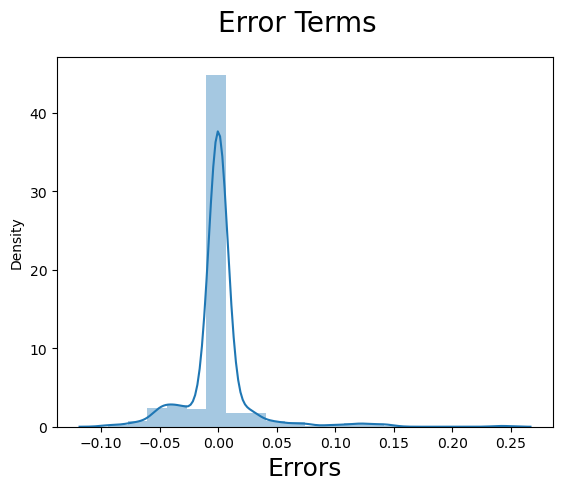

In [84]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## There is a linear relationship between X and Y

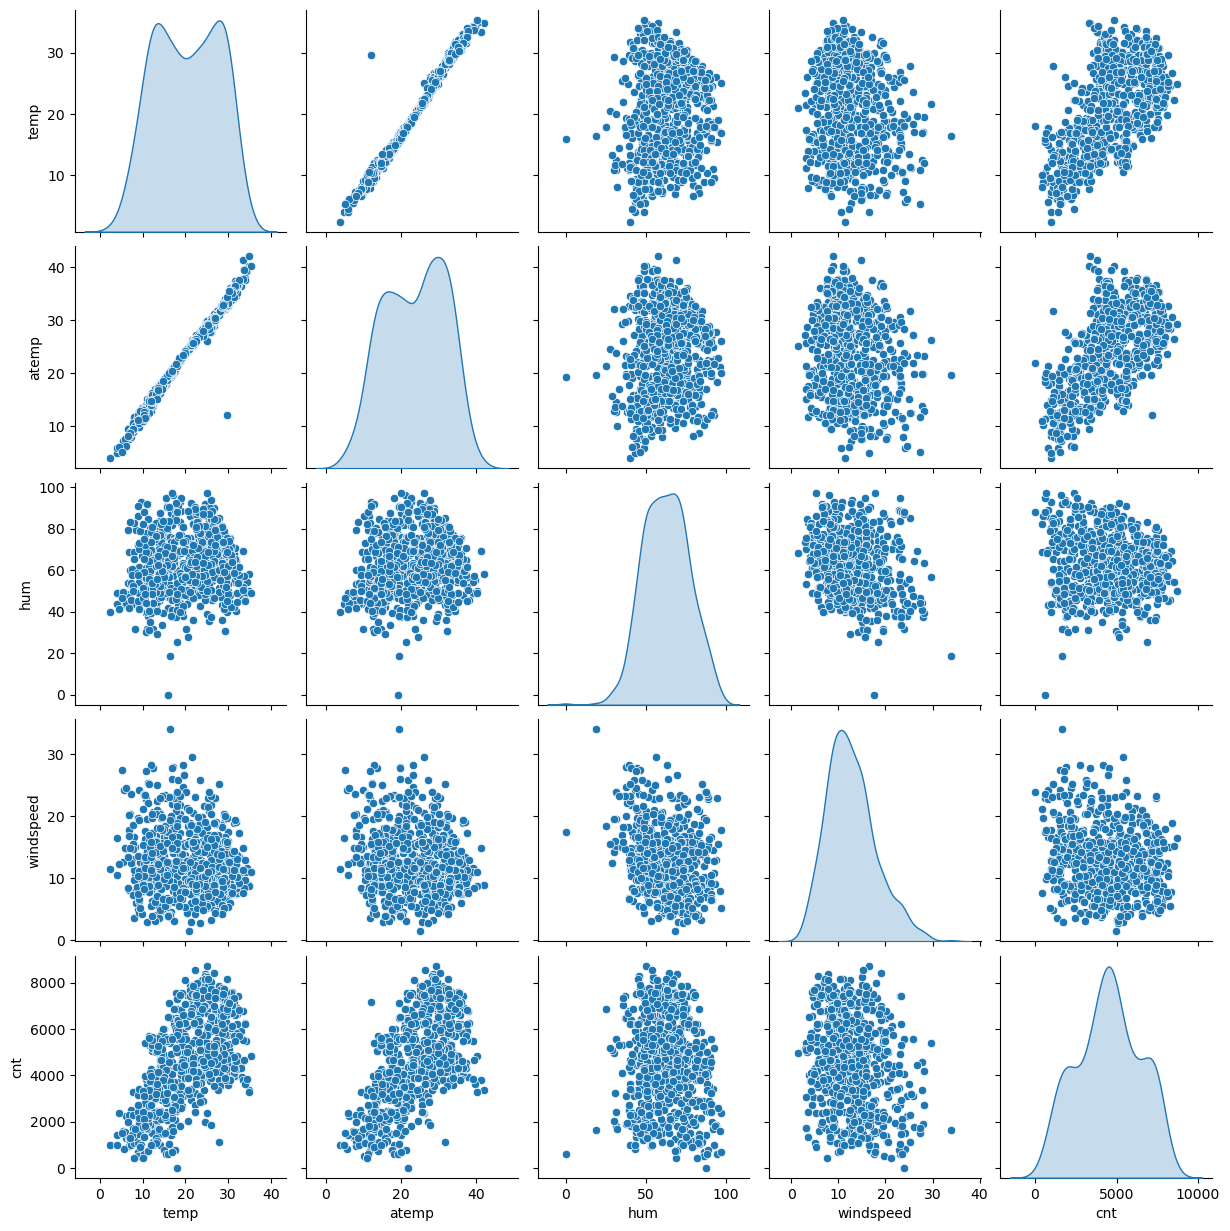

In [85]:
df_new=df_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_new, diag_kind='kde')
plt.show()

Using the pair plot, we could see there is a linear relation between temp and atemp variable with the predictor ‘cnt’.

## There is No Multicollinearity between the predictor variables

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,302.84
2,mnth,206.09
5,registered,36.26
4,weathersit,16.55
1,yr,13.14
...,...,...
179,dteday_16-05-2018,1.01
36,dteday_03-03-2018,1.01
7,dteday_01-03-2018,1.01
343,dteday_29-05-2018,1.01


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr5)


Applying the scaling on the test sets

In [87]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [88]:
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,dteday_31-05-2018,dteday_31-05-2019,dteday_31-07-2018,dteday_31-07-2019,dteday_31-08-2018,dteday_31-08-2019,dteday_31-10-2018,dteday_31-10-2019,dteday_31-12-2018,dteday_31-12-2019
184,3,0,7,1,3,0,2,0.831783,0.769660,0.657364,...,0,0,0,0,0,0,0,0,0,0
535,2,1,6,0,4,1,1,0.901354,0.842587,0.610133,...,0,0,0,0,0,0,0,0,0,0
299,4,0,10,0,6,0,2,0.511964,0.496145,0.837699,...,0,0,0,0,0,0,0,0,0,0
221,3,0,8,0,5,1,1,0.881625,0.795343,0.437098,...,0,0,0,0,0,0,0,0,0,0
152,2,0,6,0,6,0,1,0.817246,0.741471,0.314298,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,dteday_31-05-2018,dteday_31-05-2019,dteday_31-07-2018,dteday_31-07-2019,dteday_31-08-2018,dteday_31-08-2019,dteday_31-10-2018,dteday_31-10-2019,dteday_31-12-2018,dteday_31-12-2019
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.0,219.0,219.0,219.0,219.0,219.0,219.000000
mean,2.456621,0.479452,6.474886,0.036530,3.100457,0.639269,1.374429,0.558941,0.532991,0.638508,...,0.004566,0.004566,0.004566,0.0,0.0,0.0,0.0,0.0,0.0,0.004566
std,1.109463,0.500722,3.421875,0.188034,2.058536,0.481313,0.538843,0.233698,0.217888,0.148974,...,0.067574,0.067574,0.067574,0.0,0.0,0.0,0.0,0.0,0.0,0.067574
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.354650,0.344751,0.527265,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.558691,0.549198,0.627737,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.759096,0.714132,0.743928,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.984424,0.980934,1.002146,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


In [90]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,dteday_31-05-2018,dteday_31-05-2019,dteday_31-07-2018,dteday_31-07-2019,dteday_31-08-2018,dteday_31-08-2019,dteday_31-10-2018,dteday_31-10-2019,dteday_31-12-2018,dteday_31-12-2019
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.0,219.0,219.0,219.0,219.0,219.0,219.000000
mean,2.456621,0.479452,6.474886,0.036530,3.100457,0.639269,1.374429,0.558941,0.532991,0.638508,...,0.004566,0.004566,0.004566,0.0,0.0,0.0,0.0,0.0,0.0,0.004566
std,1.109463,0.500722,3.421875,0.188034,2.058536,0.481313,0.538843,0.233698,0.217888,0.148974,...,0.067574,0.067574,0.067574,0.0,0.0,0.0,0.0,0.0,0.0,0.067574
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.354650,0.344751,0.527265,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.558691,0.549198,0.627737,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.759096,0.714132,0.743928,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.984424,0.980934,1.002146,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


### Dividing into X_test and y_test

In [91]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Columns: 742 entries, season to dteday_31-12-2019
dtypes: float64(4), int64(9), uint8(729)
memory usage: 179.9 KB


In [92]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Columns: 368 entries, const to dteday_31-12-2018
dtypes: float64(1), int64(6), uint8(361)
memory usage: 90.9 KB


In [93]:
# Making predictions using the final model (lr6)

y_pred = lr5.predict(X_test_lm5)

## MODEL EVALUATION

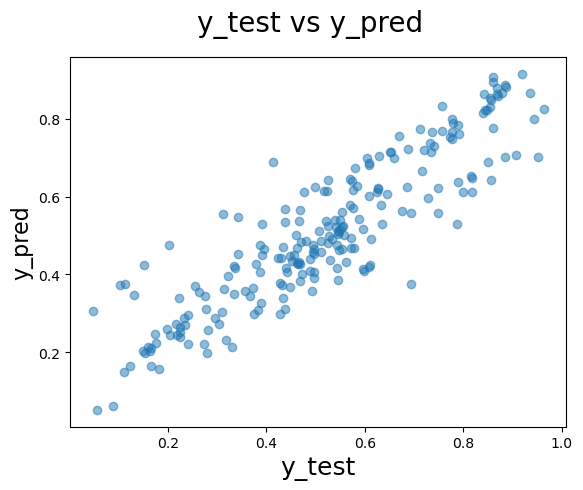

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R^2 Value for TEST

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
r2_score(y_test, y_pred)

0.7973024112692357

Adjusted R^2 Value for TEST

In [96]:
# We already have the value of R^2 (calculated in above step)

r2=0.8224454904426144

In [97]:
# Get the shape of X_test
X_test.shape

(219, 367)

In [98]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

1.2597777388155038

## Final Result Comparison

Train R^2 :0.817
Train Adjusted R^2 :0.813
Test R^2 :0.822
Test Adjusted R^2 :0.813
This seems to be a really good model that can very well 'Generalize' various datasets.

In [99]:
r2_train=0.817
r2_test=0.822

In [100]:
# Checking the difference between the test-train r2 score 
print('Difference in r2 Score(%)',(-r2_train + r2_test)*100)

Difference in r2 Score(%) 0.5000000000000004


In [101]:
Train_Adjusted_R2 = 0.813
Test_Adjusted_R2 = 0.813

In [102]:
# Checking the difference between the test-train Adjusted_R2 score 
print('Difference in Adjusted_R2 Score(%)',(Train_Adjusted_R2-Test_Adjusted_R2)*100)

Difference in Adjusted_R2 Score(%) 0.0


## FINAL REPORT